# Learning Theory Homework 
***
**Name**: $<$Xu Han$>$ 
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

**Answer:**  
According to the finite consistent hypothesis class theory,
$m\geq\frac{1}{\epsilon}(\ln\left| H \right|+\ln\frac{1}{\delta})$.

Since the size of $\left| H \right|$ is the combination of three points from a collection of 100x100 points, in this case

$\left| H \right| = \binom{100\times100}{3}=166616670000$ 

In this case, the bound on the number of training examples is 

$m\geq\frac{1}{\epsilon}(\ln\binom{10000}{3}+\ln\frac{1}{\delta})=\frac{1}{\epsilon}(25.839+\ln\frac{1}{\delta})$

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

Here in this case, $\epsilon=0.15, \delta=0.05 $ 

based on the result of Part A, $m\geq\frac{1}{0.15}(25.839+\ln\frac{1}{0.05})=192.23$,  
so $m\geq193$

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

**Answer:**

The VC dimension is 2.

**Proof:**

First we need to see if we can shatter a set of 2 points. For two points, there are four possibile situations(demostrated in the following graphs). Red color represents positive point and blue color represents negative points. From these four graphs we can see that the circles centered at the origin could successfully classify positive and negative classes in all the four situations. In this case, we can know that 2 points can be shattered and that means the VC dimension $\geq$ 2.

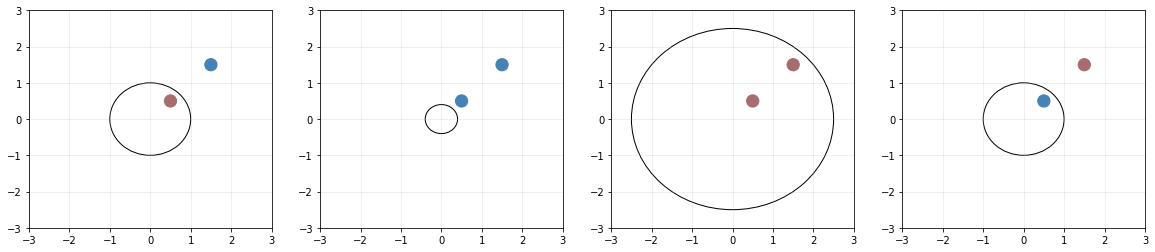

In [52]:
import matplotlib.pylab as plt
%matplotlib inline

mycolors = {"blue":"steelblue", "red":"#a76c6e",  "green":"#6a9373", "smoke":"#f2f2f2"}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
circle0 = plt.Circle((0, 0), 1,color='black',fill=False)
axes[0].scatter([0.5,1.5], [0.5,1.5], color=[mycolors["red"], mycolors["blue"]], s=150)
axes[0].set_xlim([-3,3]); axes[0].set_ylim([-3,3]); axes[0].grid(alpha=0.25)
axes[0].add_artist(circle0)
circle1 = plt.Circle((0, 0), 0.4,color='black',fill=False)
axes[1].scatter([0.5,1.5], [0.5,1.5], color=[mycolors["blue"], mycolors["blue"]], s=150)
axes[1].set_xlim([-3,3]); axes[1].set_ylim([-3,3]); axes[1].grid(alpha=0.25)
axes[1].add_artist(circle1)
circle2 = plt.Circle((0, 0), 2.5,color='black',fill=False)
axes[2].scatter([0.5,1.5], [0.5,1.5], color=[mycolors["red"], mycolors["red"]], s=150)
axes[2].set_xlim([-3,3]); axes[2].set_ylim([-3,3]); axes[2].grid(alpha=0.25)
axes[2].add_artist(circle2)
circle3 = plt.Circle((0, 0), 1,color='black',fill=False)
axes[3].scatter([0.5,1.5], [0.5,1.5], color=[mycolors["blue"], mycolors["red"]], s=150)
axes[3].set_xlim([-3,3]); axes[3].set_ylim([-3,3]); axes[3].grid(alpha=0.25)
axes[3].add_artist(circle3)
plt.show()

Now we want to prove that for all S s.t. $\left| H \right|$ = 3 there exists some labeling such that S cannot be captured by H. Let A,B and C be arbitrary points s.t. $r_a < r_b < r_c$($r_a, r_b, r_c$ is the distance of the point to the origin). Let y = (+1,-1,+1) and assume that some h where radius of the circle is $r$ works.

if h classifies points as positive if they lie on the boundary or interior of the circle, and negative otherwise:

since $y_1$ = +1, we must have $r_a\leq r$;
since $y_3$ = +1, we must have $r_c\leq r$;
then $r_a < r_b < r_c \leq r$;
but $y_2 = -1$ which is a contradiction

if h classifies points as negative if they lie on the boundary or interior of the circle, and positive otherwise:

since $y_1$ = +1, we must have $r_a\geq r$;
since $y_3$ = +1, we must have $r_c\geq r$;
then $r\leq r_a < r_b < r_c $;
but $y_2 = -1$ which is a contradiction

So the hypothesis cannot classify these 3 points correctly, which means it cannot shatter 3 points.  
So the VC dimension is 2.

The following is one of the situation.

Text(2,2.5,'C')

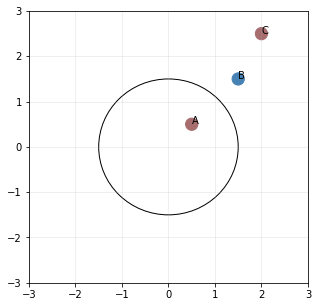

In [17]:
fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
circle4 = plt.Circle((0, 0), 1.5,color='black',fill=False)
axes2.scatter([0.5,1.5,2], [0.5,1.5,2.5], color=[mycolors["red"], mycolors["blue"], mycolors["red"]], s=150)
axes2.set_xlim([-3,3]); axes2.set_ylim([-3,3]); axes2.grid(alpha=0.25)
axes2.add_artist(circle4)
axes2.annotate("A",(0.5,0.5))
axes2.annotate("B",(1.5,1.5))
axes2.annotate("C",(2,2.5))

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

In [78]:
import random
import numpy as np
import matplotlib.pyplot as plt 

class PAC_Bounds:
    
    def _init_(self):
        pass
        
    def rectangle(self,size):
        #generate coordinates for rect
        a=np.random.random()*100
        b=np.random.random()*100
        c=np.random.random()*100
        d=np.random.random()*100
        self.x1 = max(a,b)
        self.x2 = min(a,b)
        self.y1 = max(c,d)
        self.y2 = min(c,d)
        
        while(self.x1 - self.x2 < size):
            a=np.random.random()*100
            b=np.random.random()*100
            self.x1 = max(a,b)
            self.x2 = min(a,b)
        while(self.y1 - self.y2 < size):
            c=np.random.random()*100
            d=np.random.random()*100
            self.y1 = max(c,d)
            self.y2 = min(c,d)
    
    def inside_rect(self, point):
        #to see whethere the point is inside the rect
        if(point[0]>=self.x2 and point[0]<=self.x1 and point[1]>=self.y2 and point[1]<=self.y1):
            return True
        else:
            return False
        
    def label(self):
        #to label the points who are inside the rect as positive, otherwise negative
        self.label_points=[]
        for point in self.train:
            if(self.inside_rect(point)):
                self.label_points.append(1)
            else:
                self.label_points.append(0)
 
    def rectangle_h(self):
        #to generate hypo, hypo is defined by the positive points
        in_h = []
        for i in range(0,len(self.train)):
            if self.label_points[i] == 1:
                in_h.append(self.train[i])
        x = []
        y = []
        if(len(in_h) > 0):   #there are positive points
            for i in range(0,len(in_h)):
                x.append(in_h[i][0])
                y.append(in_h[i][1])
        
            self.x1_h=max(x)
            self.x2_h=min(x)
            self.y1_h=max(y)
            self.y2_h=min(y)
        else:
            self.x1_h=0
            self.x2_h=0
            self.y1_h=0
            self.y2_h=0
            print("There are no positive points, try again")
    
    def calculate(self):
        #calculate generalization error
        count=0
        not_err=0
        for i in range(0,self.m_pre):
            if(self.pre[i][0]>=self.x2 and self.pre[i][0]<=self.x1 and self.pre[i][1]>=self.y2 and self.pre[i][1]<=self.y1):
                count+=1
            if(self.pre[i][0]>=self.x2_h and self.pre[i][0]<=self.x1_h and self.pre[i][1]>=self.y2_h and self.pre[i][1]<=self.y1_h):
                not_err+=1
        #print(count,not_err)
        if(not_err !=0 ):
            #print('generalization error of',self.m_pre,'new points',1-not_err/count)
            return (1-not_err/count)
        else:
            #print('generalization error of',self.m_pre,'new points',0)
            return 0
            
        
        
    
    def output(self,distribution_type, size_train, size_test, graph):
        #generate normal distribution for training set
        if(distribution_type == "Normal"):
            self.m = size_train
            self.train = [[0 for col in range(2)] for row in range(self.m)]
            mean = [50, 50]
            cov = [[625, 0], [0, 625]] 
            x,y = np.random.multivariate_normal(mean, cov, self.m).T
            for i in range(0,self.m):
                self.train[i][0] = x[i]
                self.train[i][1] = y[i]
        
        ##generate normal distribution for test set
            self.m_pre = size_test
            self.pre = [[0 for col in range(2)] for row in range(self.m_pre)]
            mean = [50, 50]
            cov = [[625, 0], [0, 625]] 
            x_pre, y_pre = np.random.multivariate_normal(mean, cov, self.m_pre).T
            for i in range(0,self.m_pre):
                self.pre[i][0] = x_pre[i]
                self.pre[i][1] = y_pre[i]
        #generate uniform distribution for training set
        elif(distribution_type == "Uniform"):
            x=[]
            y=[]
            self.m = size_train
            self.train = [[0 for col in range(2)] for row in range(self.m)] 
            for i in range(0,self.m):
                self.train[i][0] = np.random.uniform()*100
                x.append(self.train[i][0])
                self.train[i][1] = np.random.uniform()*100
                y.append(self.train[i][1])
            x=np.array(x)
            y=np.array(y)
        
        ##generate uniform distribution for test set
            x_pre=[]
            y_pre=[]
            self.m_pre = size_test
            self.pre = [[0 for col in range(2)] for row in range(self.m_pre)]
            for i in range(0,self.m_pre):
                self.pre[i][0] = np.random.uniform()*100
                x_pre.append(self.pre[i][0])
                self.pre[i][1] = np.random.uniform()*100
                y_pre.append(self.pre[i][1])
            
            x_pre=np.array(x_pre)
            y_pre=np.array(y_pre)
        
        self.rectangle(10)
        self.label()
        self.rectangle_h()
        gen_error = self.calculate()
        
        
        if(graph):
        #draw graph
            plt.figure(figsize=(10, 8))
            plt.plot(x.tolist(),y.tolist(),'x')
            plt.plot(x_pre.tolist(),y_pre.tolist(),'x')
            plt.plot([self.x1,self.x1,self.x2,self.x2,self.x1], [self.y1,self.y2,self.y2,self.y1,self.y1], color='black',ls="--")
            plt.plot([self.x1_h,self.x1_h,self.x2_h,self.x2_h,self.x1_h], [self.y1_h,self.y2_h,self.y2_h,self.y1_h,self.y1_h], color='brown',ls="--")
            plt.legend(labels=['training points','prediction points','C-rect','H-rect'],loc="best")
        
        return gen_error
        
        
        
        

        



the worst case generalization error at the confidence level 1-0.05 is 0.020000000000000018


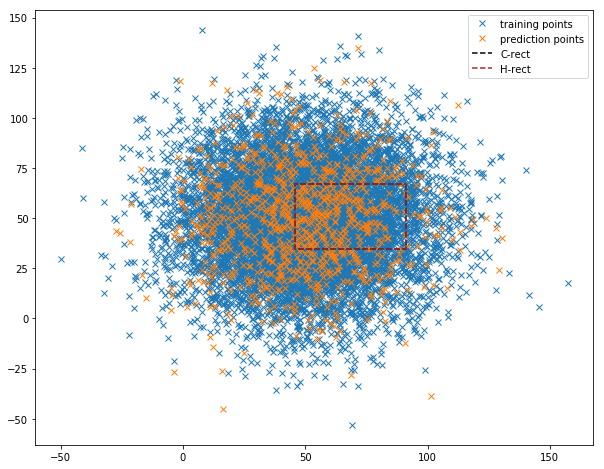

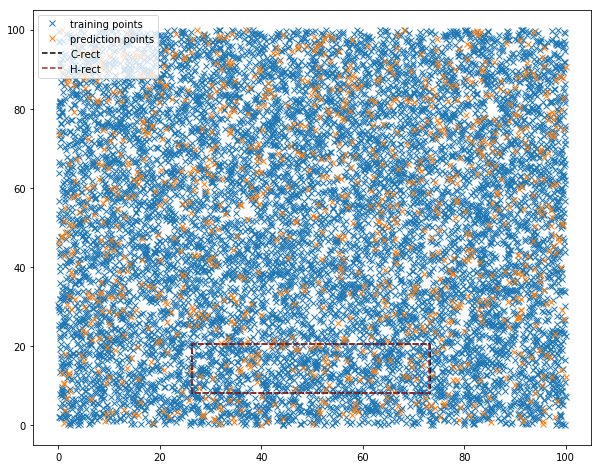

In [101]:
train_size = 10000
test_size = 1000

test=PAC_Bounds()
test.output("Normal",train_size,test_size,True)
test=PAC_Bounds()
test.output("Uniform",train_size,test_size,True)

gen_error = []

for i in range(0,500):        
    test=PAC_Bounds()
    gen_error.append(test.output("Normal",train_size,test_size,False))

gen_error.sort()
print("the worst case generalization error at the confidence level 1-0.05 is", gen_error[474])

**Note:**

In Part A, I generate normal distribution of data with mean = 50 and variance = 25 and uniform distribution of data between 0 and 100. I have defined the minimum size of my concept rectangle as 10x10 to avoid the cases where there are no positive points inside the rectangle. I have increased the number of runs as 500 in simulation. The training size is 10000 and the test size is 1000. When calculate the $\epsilon$, I use the normal distribution.

**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

In [84]:
gen_error = []
train_size = [250,500,1000,1250,1500]
test_size = 1000
for m in range(0,len(train_size)):
    gen_error_with_m = []
    for i in range(0,100):        
        test=PAC_Bounds()
        gen_error_with_m.append(test.output("Uniform",train_size[m],test_size,False))
    gen_error_with_m.sort()
    gen_error.append(gen_error_with_m[94])
    print("When the training size is",train_size[m], "the generalization error with confidence level 1-0.05 is",gen_error[m])
    

When the training size is 250 the generalization error with confidence level 1-0.05 is 0.6176470588235294
When the training size is 500 the generalization error with confidence level 1-0.05 is 0.30434782608695654
When the training size is 1000 the generalization error with confidence level 1-0.05 is 0.125
When the training size is 1250 the generalization error with confidence level 1-0.05 is 0.13953488372093026
When the training size is 1500 the generalization error with confidence level 1-0.05 is 0.12121212121212122


When the training size is 1024 the generalization error with confidence level 1-0.05 is 0.16417910447761197
When the training size is 2048 the generalization error with confidence level 1-0.05 is 0.11475409836065575
When the training size is 4096 the generalization error with confidence level 1-0.05 is 0.03355704697986572
When the training size is 8192 the generalization error with confidence level 1-0.05 is 0.02020202020202022
When the training size is 16384 the generalization error with confidence level 1-0.05 is 0.015625
When the training size is 32768 the generalization error with confidence level 1-0.05 is 0.0039215686274509665
When the training size is 65536 the generalization error with confidence level 1-0.05 is 0.0020661157024793875


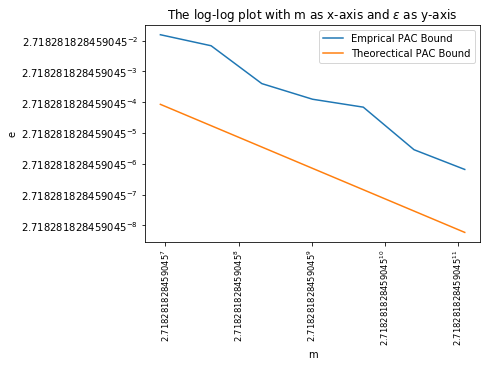

In [87]:
import math
#draw log-log plot
gen_error = []
train_size = [1024,2048,4096,8192,16384,32768,65536]
test_size = 1000
for m in range(0,len(train_size)):
    gen_error_with_m = []
    for i in range(0,100):        
        test=PAC_Bounds()
        gen_error_with_m.append(test.output("Uniform",train_size[m],test_size,False))
    gen_error_with_m.sort()
    gen_error.append(gen_error_with_m[94])
    print("When the training size is",train_size[m], "the generalization error with confidence level 1-0.05 is",gen_error[m])

#calculate theorectical PAC Bound 
gen_error_theo = []
for m in range(0,len(train_size)):
    gen_error_theo.append(4*math.log((4/0.05))/train_size[m]) 


plt.loglog(train_size,gen_error,basex=np.e,basey=np.e)
plt.loglog(train_size,gen_error_theo,basex=np.e,basey=np.e)
plt.title("The log-log plot with m as x-axis and $\epsilon$ as y-axis")
plt.xticks(size='small',rotation='vertical')
plt.xlabel("m")
plt.ylabel("e")
plt.legend(["Emprical PAC Bound","Theorectical PAC Bound"])
plt.show()



**Analysis:**
In Part B, I generate uniform distribution of data between 0 and 100. I have defined the minimum size of my concept rectangle as 10x10 to avoid the cases where there are no positive points inside the rectangle. I have increased the number of runs as 100 in simulation.

According to the theory, $$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$
we can know that the theorectical PAC Bound is a line with slope = -1, as demostrated in the log-log plot. As for the empirical PAC Bound, the log-log plot satisfy the trend: the empirical PAC Bound is generally also a line with the same slope as the theorectical PAC Bound. In this case, we successfully prove the theorectical PAC Bound through our empirical experiments.

During the experiment, I also found that the randomly generated C rectangle would greatly influence the absolute value of our calculated $\epsilon$, since the points number inside the C rectangle is totally random and the number will influence the $\epsilon$. When I increase the minimum size of my C rectangle as 20x20, the absolute $\epsilon$ value sharply decreased.

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

In [95]:
gen_error = []
train_size = [250,500,1000,1250,1500]
test_size = 1000
for m in range(0,len(train_size)):
    gen_error_with_m = []
    for i in range(0,100):        
        test=PAC_Bounds()
        gen_error_with_m.append(test.output("Normal",train_size[m],test_size,False))
    gen_error_with_m.sort()
    gen_error.append(gen_error_with_m[94])
    print("When the training size is",train_size[m], "the generalization error with confidence level 1-0.05 is",gen_error[m])

When the training size is 250 the generalization error with confidence level 1-0.05 is 0.7222222222222222
When the training size is 500 the generalization error with confidence level 1-0.05 is 0.19480519480519476
When the training size is 1000 the generalization error with confidence level 1-0.05 is 0.19047619047619047
When the training size is 1250 the generalization error with confidence level 1-0.05 is 0.1063829787234043
When the training size is 1500 the generalization error with confidence level 1-0.05 is 0.08955223880597019


When the training size is 1024 the generalization error with confidence level 1-0.05 is 0.22499999999999998
When the training size is 2048 the generalization error with confidence level 1-0.05 is 0.10810810810810811
When the training size is 4096 the generalization error with confidence level 1-0.05 is 0.08333333333333337
When the training size is 8192 the generalization error with confidence level 1-0.05 is 0.02298850574712641
When the training size is 16384 the generalization error with confidence level 1-0.05 is 0.011235955056179803
When the training size is 32768 the generalization error with confidence level 1-0.05 is 0.0080971659919028
When the training size is 65536 the generalization error with confidence level 1-0.05 is 0.004672897196261627


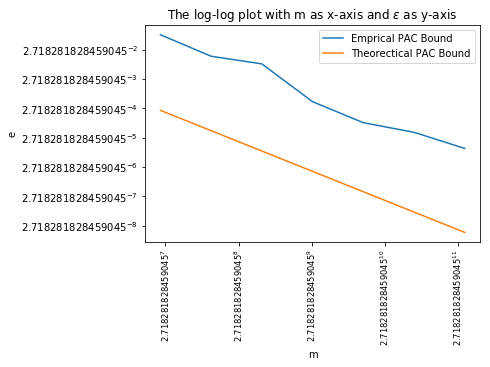

In [100]:
import math
#draw log-log plot
gen_error = []
train_size = [1024,2048,4096,8192,16384,32768,65536]
test_size = 1000
for m in range(0,len(train_size)):
    gen_error_with_m = []
    for i in range(0,100):        
        test=PAC_Bounds()
        gen_error_with_m.append(test.output("Normal",train_size[m],test_size,False))
    gen_error_with_m.sort()
    gen_error.append(gen_error_with_m[94])
    print("When the training size is",train_size[m], "the generalization error with confidence level 1-0.05 is",gen_error[m])

#calculate theorectical PAC Bound 
gen_error_theo = []
for m in range(0,len(train_size)):
    gen_error_theo.append(4*math.log((4/0.05))/train_size[m]) 


plt.loglog(train_size,gen_error,basex=np.e,basey=np.e)
plt.loglog(train_size,gen_error_theo,basex=np.e,basey=np.e)
plt.title("The log-log plot with m as x-axis and $\epsilon$ as y-axis")
plt.xticks(size='small',rotation='vertical')
plt.xlabel("m")
plt.ylabel("e")
plt.legend(["Emprical PAC Bound","Theorectical PAC Bound"])
plt.show()


**Analysis:**
In Part C, I generate normal distribution of data with mean = 50 and variance = 25. I have defined the minimum size of my concept rectangle as 10x10 to avoid the cases where there are no positive points inside the rectangle. I have increased the number of runs as 100 in simulation.

According to the theory, $$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$
we can know that the theorectical PAC Bound is a line with slope = -1, as demostrated in the log-log plot. As for the empirical PAC Bound, the log-log plot satisfy the trend: the empirical PAC Bound is generally also a line with the same slope as the theorectical PAC Bound. In this case, we successfully prove the theorectical PAC Bound through our empirical experiments. It is also true with the normal distribution that the randomly generated C rectangle would greatly influence the absolute value of our calculated $\epsilon$, since the points number inside the C rectangle is totally random and the number will influence the $\epsilon$. When I increase the minimum size of my C rectangle as 20x20, the absolute $\epsilon$ value sharply decreased.

What's more, I don't expect that different data distribution would influence the empricial PAC Bound result since the PAC Bound has nothing to do with the data distribution and the empirical results in Part B and Part C also proved that point. However, since the normal distribution tends to have higher chance that a C rectangle has small number of points inside it or the H rectangle is very close to C rectangle, the results of normal distribution might have more possibilities than uniform distribution. 